In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 100, 3
factors = [np.random.rand(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += np.random.randn(*data.shape) # add noise

In [3]:
results = tt.fit_ensemble(data, range(1, 9), replicates=3, p_holdout=0.1, nonneg=True)

Optimizing rank-1 models.
   3/3 converged, min error = 0.8976, max error = 0.8979, mean error = 0.8977, time to fit = 1.0655s
Optimizing rank-2 models.
   3/3 converged, min error = 0.8945, max error = 0.8946, mean error = 0.8946, time to fit = 8.9617s
Optimizing rank-3 models.
   3/3 converged, min error = 0.8917, max error = 0.8920, mean error = 0.8919, time to fit = 19.1569s
Optimizing rank-4 models.
   3/3 converged, min error = 0.8917, max error = 0.8918, mean error = 0.8917, time to fit = 34.2978s
Optimizing rank-5 models.
   3/3 converged, min error = 0.8913, max error = 0.8914, mean error = 0.8914, time to fit = 49.7473s
Optimizing rank-6 models.
   3/3 converged, min error = 0.8912, max error = 0.8914, mean error = 0.8913, time to fit = 48.8147s
Optimizing rank-7 models.
   3/3 converged, min error = 0.8910, max error = 0.8911, mean error = 0.8911, time to fit = 64.1936s
Optimizing rank-8 models.
   3/3 converged, min error = 0.8906, max error = 0.8908, mean error = 0.8906, t

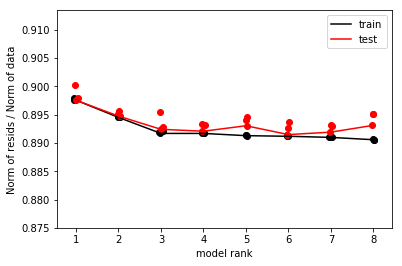

In [4]:
ax = tt.plot_error(results, partition='train',
                   line_kw=dict(c='k', label='train'), scatter_kw=dict(c='k'));
tt.plot_error(results, partition='test', ax=ax,
              line_kw=dict(c='r', label='test'), scatter_kw=dict(c='r'));
plt.legend()